In [118]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']
#data2 = data[data['user'] == 'Aluminiumminimumimmunity']
#data2 = data[data['user'] == 'fyodor_m_d1821']



#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
#data2 = data[data['user'] == 'peroni_nasturo_azuro']
#data2 = data[data['user'] == 'icep1cke']
#data2 = data[data['user'] == 'bigladmush22']










# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
33,75,115,8767.0,9082.0
70,77,8,263.0,14994.0
71,78,5,627.0,20128.0
53,79,64,12397.0,18445.0
50,80,65,6616.0,22263.0
56,81,50,4059.0,22666.0
62,82,29,949.0,23537.0
27,83,145,11859.0,13756.0
54,84,59,6081.0,20460.0
73,88,3,36.0,23717.0


In [119]:
data2['user'].max()

'klimzaa'

In [120]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
84,84,59.0,6081.0,20460.0
85,85,0.0,0.0,0.0
86,86,0.0,0.0,0.0
87,87,0.0,0.0,0.0
88,88,3.0,36.0,23717.0


In [121]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,89.000000,89.000000,89.000000,89.000000
mean,44.000000,100.449438,9677.685393,16079.865169
std,25.836021,96.979498,8020.821684,8248.097960
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,15.000000,821.000000,12221.000000
50%,44.000000,75.000000,10097.000000,18147.000000
75%,66.000000,161.000000,17157.000000,21262.000000
max,88.000000,453.000000,26039.000000,36105.000000


In [122]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,14.0,13093.0,17697.0,3.636944,4.915833
1,1,159.0,17692.0,17831.0,4.914444,4.953056
2,2,161.0,11188.0,19147.0,3.107778,5.318611
3,3,0.0,0.0,0.0,0.000000,0.000000
4,4,244.0,18496.0,18734.0,5.137778,5.203889


In [123]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,14.0,13093.0,17697.0,3.636944,4.915833,73.984291
1,1,159.0,17692.0,17831.0,4.914444,4.953056,99.220459
2,2,161.0,11188.0,19147.0,3.107778,5.318611,58.432130
3,3,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,4,244.0,18496.0,18734.0,5.137778,5.203889,98.729583
5,5,125.0,17704.0,20382.0,4.917778,5.661667,86.860956
6,6,151.0,16232.0,16563.0,4.508889,4.600833,98.001570
7,7,40.0,10643.0,17773.0,2.956389,4.936944,59.882969
8,8,161.0,16125.0,18686.0,4.479167,5.190556,86.294552
9,9,191.0,15567.0,16418.0,4.324167,4.560556,94.816665


In [124]:
stream_stats['persenteg'].describe()

count    89.000000
mean     51.597034
std      39.807178
min       0.000000
25%       4.829696
50%      60.641207
75%      90.417495
max      99.931631
Name: persenteg, dtype: float64

In [125]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
15,15,0.0,0.0,0.0,0.0,0.0,0.0
86,86,0.0,0.0,0.0,0.0,0.0,0.0
39,39,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0
85,85,0.0,0.0,0.0,0.0,0.0,0.0
61,61,0.0,0.0,0.0,0.0,0.0,0.0
23,23,0.0,0.0,0.0,0.0,0.0,0.0
22,22,0.0,0.0,0.0,0.0,0.0,0.0
21,21,0.0,0.0,0.0,0.0,0.0,0.0
19,19,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
stream_stats['watch_length_in_hour'].sum() /24

9.968912037037036

In [127]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
15,15,0.0,0.0,0.0,0.0,0.0,0.0
86,86,0.0,0.0,0.0,0.0,0.0,0.0
39,39,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0
85,85,0.0,0.0,0.0,0.0,0.0,0.0
61,61,0.0,0.0,0.0,0.0,0.0,0.0
23,23,0.0,0.0,0.0,0.0,0.0,0.0
22,22,0.0,0.0,0.0,0.0,0.0,0.0
21,21,0.0,0.0,0.0,0.0,0.0,0.0
19,19,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
59,59,81.0,16819.0,17193.0,4.671944,4.775833,97.824696
42,42,75.0,7666.0,7832.0,2.129444,2.175556,97.880490
6,6,151.0,16232.0,16563.0,4.508889,4.600833,98.001570
11,11,64.0,20017.0,20346.0,5.560278,5.651667,98.382975
66,66,111.0,17877.0,18147.0,4.965833,5.040833,98.512151
4,4,244.0,18496.0,18734.0,5.137778,5.203889,98.729583
1,1,159.0,17692.0,17831.0,4.914444,4.953056,99.220459
30,30,148.0,10610.0,10681.0,2.947222,2.966944,99.335268
69,69,246.0,18471.0,18515.0,5.130833,5.143056,99.762355
12,12,82.0,20463.0,20477.0,5.684167,5.688056,99.931631


In [129]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
79,79,64.0,12397.0,18445.0,3.443611,5.123611,67.210626
80,80,65.0,6616.0,22263.0,1.837778,6.184167,29.717468
81,81,50.0,4059.0,22666.0,1.127500,6.296111,17.907880
82,82,29.0,949.0,23537.0,0.263611,6.538056,4.031950
83,83,145.0,11859.0,13756.0,3.294167,3.821111,86.209654
84,84,59.0,6081.0,20460.0,1.689167,5.683333,29.721408
85,85,0.0,0.0,0.0,0.000000,0.000000,0.000000
86,86,0.0,0.0,0.0,0.000000,0.000000,0.000000
87,87,0.0,0.0,0.0,0.000000,0.000000,0.000000
88,88,3.0,36.0,23717.0,0.010000,6.588056,0.151790


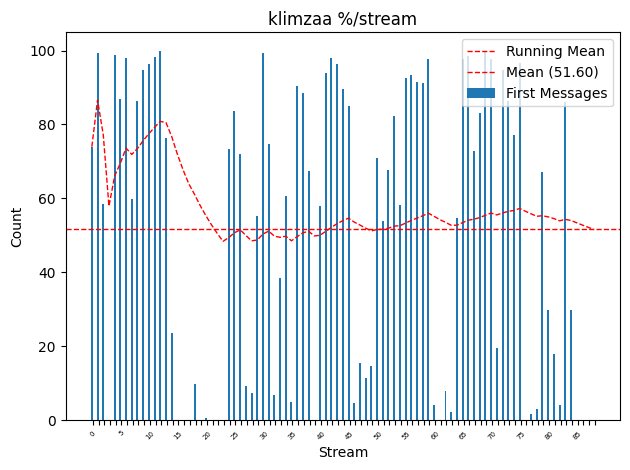

In [130]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()